In [1]:
import os
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torch.utils.data import DataLoader

from apn import APN
from data.cub import CUBDatasetSimple

In [2]:
test_transforms = T.Compose([
    T.Resize(size=448, antialias=True),
    T.CenterCrop(size=448),
    T.ToTensor()
])

dataset_val = CUBDatasetSimple(os.path.join('datasets', 'CUB'), split='val', transforms=test_transforms)

In [3]:
net = APN(attr_class_map=dataset_val.attr_class_map, k=107, attr_groups=dataset_val.attr_groups)
state_dict = torch.load('checkpoints/checkpoint.pt', map_location='cpu')
net.load_state_dict(state_dict)

<All keys matched successfully>

In [202]:
idx = 5540
net.eval()
with torch.no_grad():
    image, class_tgts, attr_tgts = dataset_val[idx]
    image = image.unsqueeze(0)
    final_logits, local_logits, attn_maps, prototypes, max_logit_coords = net(image)

In [203]:
class_tgts

tensor(191)

In [204]:
attn_maps.shape

torch.Size([1, 107, 14, 14])

In [205]:
dataset_val.attribute_df.reset_index(drop=True)

,attribute_name,part_name,part_id
0,has_bill_shape::dagger,head,0
1,has_bill_shape::hooked_seabird,head,0
2,has_bill_shape::all-purpose,head,0
3,has_bill_shape::cone,head,0
4,has_wing_color::brown,wing,6
...,...,...,...
102,has_crown_color::white,head,0
103,has_wing_pattern::solid,wing,6
104,has_wing_pattern::spotted,wing,6
105,has_wing_pattern::striped,wing,6


In [206]:
vals, idxs = torch.topk(dataset_val.attr_class_map[190], k=10)
vals, idxs

(tensor([0.9913, 0.9494, 0.9371, 0.9371, 0.9147, 0.9091, 0.9057, 0.9000, 0.9000,
         0.8881]),
 tensor([61, 84, 50,  7, 28, 13,  8, 20, 89, 14]))

In [207]:
torch.max(attn_maps.squeeze())

tensor(0.0356)

In [200]:
dataset_val.attribute_df.reset_index(drop=True).iloc[idxs.numpy()]

,attribute_name,part_name,part_id
61,has_under_tail_color::black,tail,5
84,has_belly_pattern::solid,belly,2
50,has_eye_color::black,head,0
7,has_wing_color::black,wing,6
28,has_back_color::black,back,1
13,has_upperparts_color::black,breast,3
8,has_wing_color::white,wing,6
20,has_underparts_color::white,belly,2
89,has_primary_color::white,breast,3
14,has_upperparts_color::white,breast,3


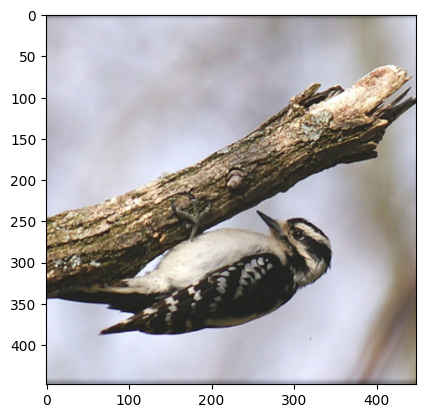

In [188]:
plt.imshow(image.squeeze().permute(1,2,0).numpy())
plt.show()